```Gabriel A. Amici - 23/05/2025```

# Comparação entre diferentes potenciais

Potenciais:
1. Coulomb
2. soft-Coulomb
3. Morse-soft-Coulomb
4. normaized Morse-soft-Coulomb

In [1]:
!which python
import emerald
emerald.__file__

/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/Dev/.venv/bin/python


'/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/Dev/src/emerald/__init__.py'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('plotstyle.mplstyle')

In [3]:
import matplotlib ; print(matplotlib.__version__)

3.10.3


In [4]:
Perc7_DKBLUE_1 = '#340498'
Perc7_PURPUR_2 = '#6c00a8'
Perc7_VIOLET_3 = '#a31d99'
Perc7_PINKSH_4 = '#ca4678'
Perc7_AMBERS_5 = '#e97257'
Perc7_ORANGE_6 = '#fa9f3a'
Perc7_YELLOW_7 = '#f8db24'

Perc7 = [Perc7_DKBLUE_1, Perc7_PURPUR_2, Perc7_VIOLET_3, Perc7_PINKSH_4, Perc7_AMBERS_5, Perc7_ORANGE_6, Perc7_YELLOW_7]

Perc5_DKBLUE_1 = '#340498'
Perc5_PURPLE_2 = '#7e03a7'
Perc5_PINKSH_3 = '#b83289'
Perc5_ROSSEE_4 = '#de6063'
Perc5_ORANGE_5 = '#f8983d'

Perc5 = [Perc5_DKBLUE_1, Perc5_PURPLE_2, Perc5_PINKSH_3, Perc5_ROSSEE_4, Perc5_ORANGE_5]
Perc5_reverse = Perc5[::-1]

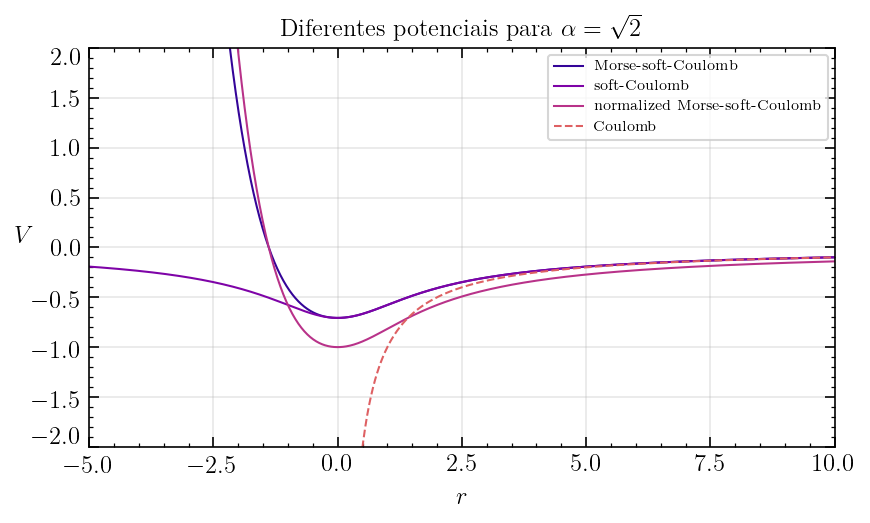

In [5]:
from emerald.potentials.coulomb_potential import C_potential_vec, C_return_points
from emerald.potentials.msc_potential import MsC_potential_vec, MsC_return_points
from emerald.potentials.sc_potential import sC_potential_vec, sC_return_points
from emerald.potentials.normalized_msc_potential import nMsC_potential_vec, nMsC_return_points

alpha = np.sqrt(2)
rs = np.linspace(-10, 10, 1000)
Cs = C_potential_vec(rs)
MsCs = MsC_potential_vec(alpha, rs)
sCs = sC_potential_vec(alpha, rs)
nMsCs = nMsC_potential_vec(alpha, rs)

plt.xlim(-5, 10)
plt.xticks(np.arange(-5, 12.5, 2.5))
plt.ylim( -2, 2)
plt.grid(alpha=0.3)

plt.xlabel("$r$")
plt.ylabel("$V$", rotation=0)

plt.plot(rs, MsCs, label="Morse-soft-Coulomb")
plt.plot(rs, sCs, label="soft-Coulomb")
plt.plot(rs, nMsCs, label="normalized Morse-soft-Coulomb")
plt.plot(rs, Cs, label="Coulomb", ls="dashed")
plt.title(r"Diferentes potenciais para $\alpha = \sqrt{2}$")
plt.gca().get_yticklabels()[0].set_verticalalignment("bottom")
plt.gca().get_yticklabels()[-1].set_verticalalignment("top")
plt.legend()
plt.savefig("Fig1a.pdf", bbox_inches="tight")
plt.show()

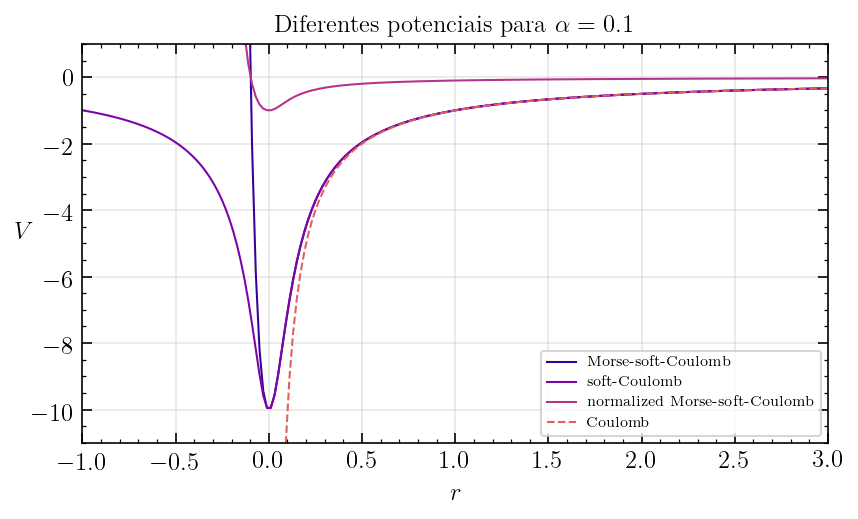

In [10]:
from emerald.potentials.coulomb_potential import C_potential_vec, C_return_points
from emerald.potentials.msc_potential import MsC_potential_vec, MsC_return_points
from emerald.potentials.sc_potential import sC_potential_vec, sC_return_points
from emerald.potentials.normalized_msc_potential import nMsC_potential_vec, nMsC_return_points

alpha = 0.1
rs = np.linspace(-10, 10, 1000)
Cs = C_potential_vec(rs)
MsCs = MsC_potential_vec(alpha, rs)
sCs = sC_potential_vec(alpha, rs)
nMsCs = nMsC_potential_vec(alpha, rs)

plt.xlim(-1, 3)
plt.ylim( -11, 1)
plt.grid(alpha=0.3)

plt.xlabel("$r$")
plt.ylabel("$V$", rotation=0)

plt.plot(rs, MsCs, label="Morse-soft-Coulomb")
plt.plot(rs, sCs, label="soft-Coulomb")
plt.plot(rs, nMsCs, label="normalized Morse-soft-Coulomb")
plt.plot(rs, Cs, label="Coulomb", ls="dashed")
plt.title(r"Diferentes potenciais para $\alpha = 0.1$")
plt.gca().get_yticklabels()[0].set_verticalalignment("bottom")
plt.gca().get_yticklabels()[-1].set_verticalalignment("top")
plt.legend()
plt.savefig("Fig1b.pdf", bbox_inches="tight")
plt.show()

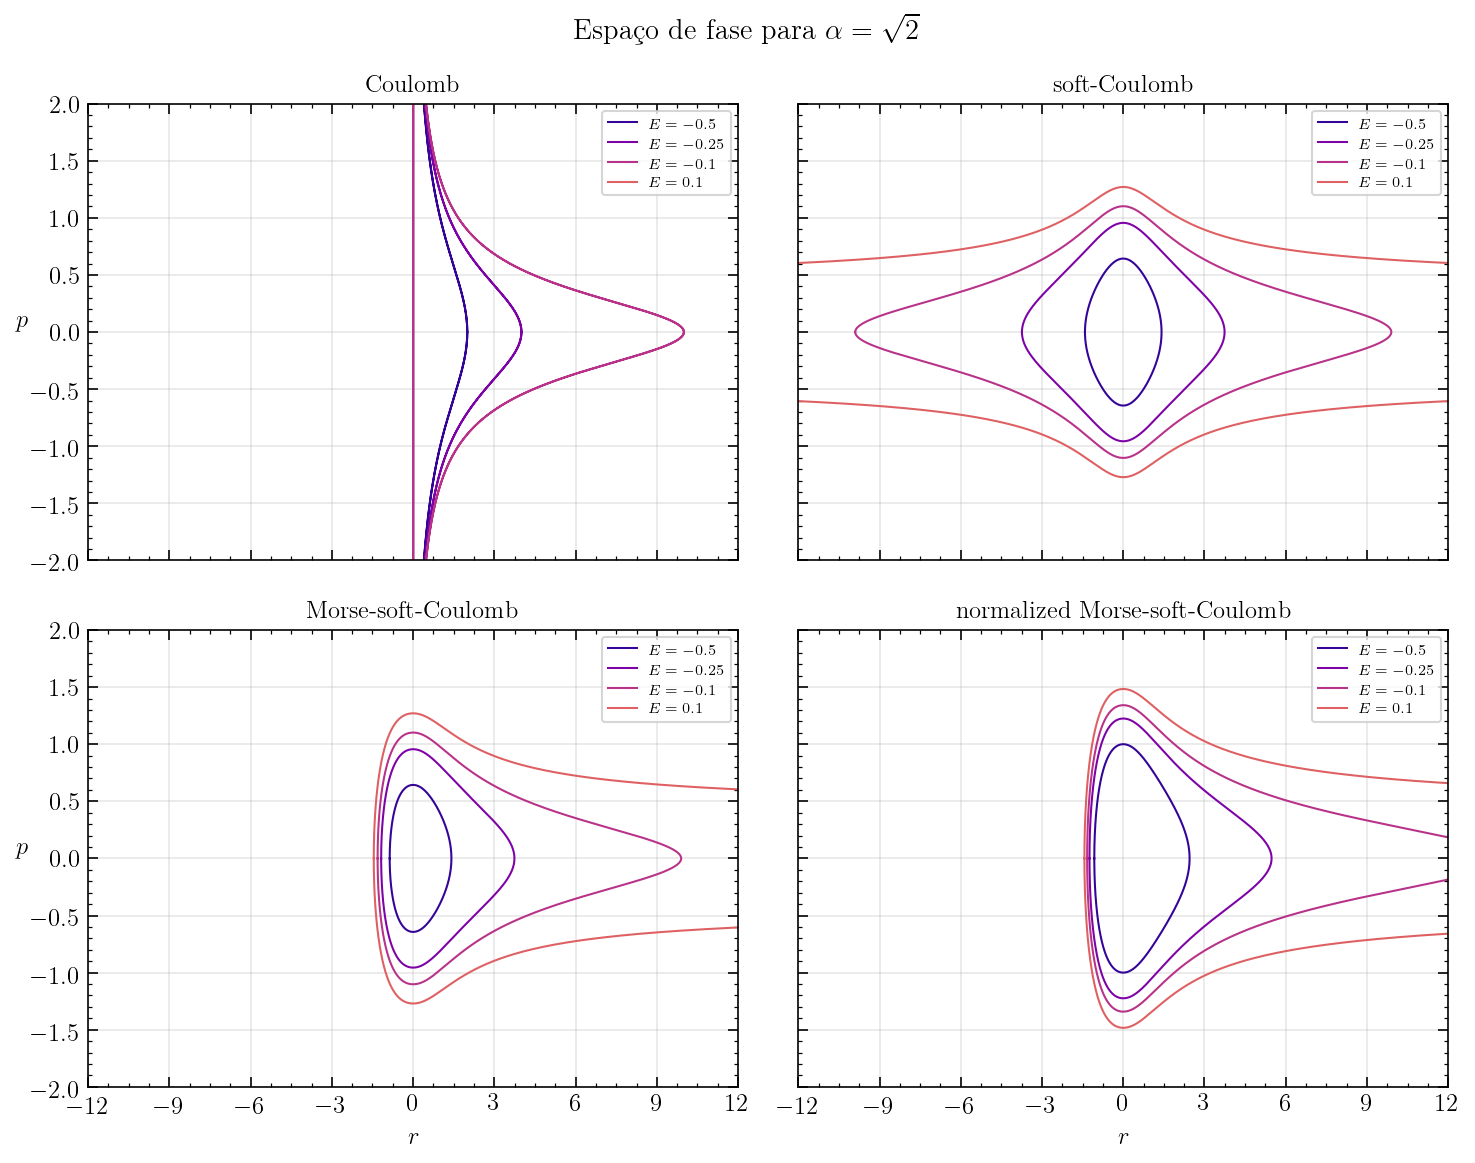

In [19]:
from emerald.classical.coulomb_unperturbed import C_phase_space
from emerald.classical.sc_unperturbed import sC_phase_space
from emerald.classical.msc_unperturbed import MsC_phase_space
from emerald.classical.normalized_msc_unperturbed import nMsC_phase_space


# Configuração do grid 2x2 de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)  
plt.subplots_adjust(wspace=0.3, hspace=0.4) 

alpha = np.sqrt(2)
E_array = [-0.5, -0.25, -0.1, 0.1]

rM = 12

# Subplot 1
for E in E_array:
    phase_space = C_phase_space(E)
    axs[0, 0].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[0, 0].set_title('Coulomb', fontsize=12)
axs[0, 0].set_ylabel('$p$', rotation=0)
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.3)

# Subplot 2
for E in E_array:
    phase_space = sC_phase_space(alpha, E, rM=rM+1)
    axs[0, 1].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[0, 1].set_title('soft-Coulomb', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid(alpha=0.3)

# Subplot 3
for E in E_array:
    phase_space = MsC_phase_space(alpha, E, rM=rM+1)
    axs[1, 0].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[1, 0].set_title('Morse-soft-Coulomb', fontsize=12)
axs[1, 0].set_xlabel('$r$')
axs[1, 0].set_ylabel('$p$', rotation=0)
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.3)

# Subplot 4
for E in E_array:
    phase_space = nMsC_phase_space(alpha, E, rM=rM+1)
    axs[1, 1].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[1, 1].set_title('normalized Morse-soft-Coulomb', fontsize=12)
axs[1, 1].set_xlabel('$r$')
axs[1, 1].legend()
axs[1, 1].grid(alpha=0.3)

# Título
fig.suptitle(r'Espaço de fase para $\alpha = \sqrt{2}$', fontsize=14, y=0.98)

plt.xlim(-12, 12)
plt.xticks(np.arange(-12, 15, 3))
plt.ylim(-2, 2)
plt.tight_layout()
plt.savefig("Fig2a.pdf", bbox_inches="tight")
plt.show()

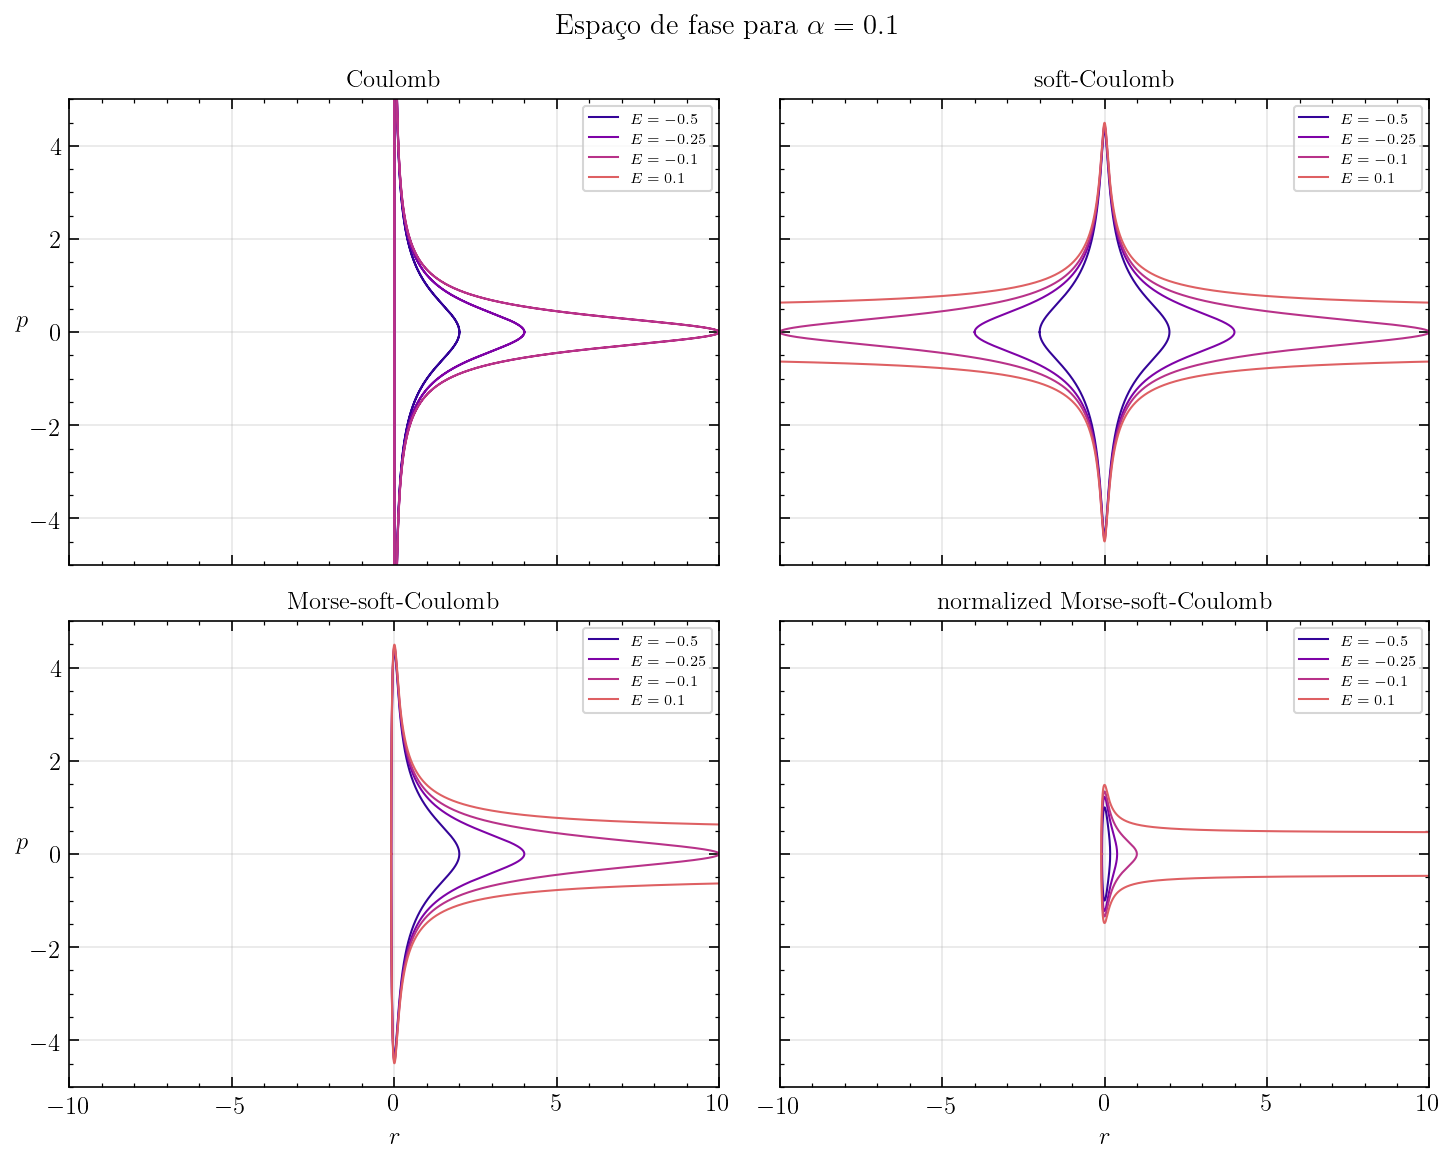

In [20]:
from emerald.classical.coulomb_unperturbed import C_phase_space
from emerald.classical.sc_unperturbed import sC_phase_space
from emerald.classical.msc_unperturbed import MsC_phase_space
from emerald.classical.normalized_msc_unperturbed import nMsC_phase_space


# Configuração do grid 2x2 de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)  
plt.subplots_adjust(wspace=0.3, hspace=0.4) 

alpha = 0.1
E_array = [-0.5, -0.25, -0.1, 0.1]

rM = 12

# Subplot 1
for E in E_array:
    phase_space = C_phase_space(E)
    axs[0, 0].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[0, 0].set_title('Coulomb', fontsize=12)
axs[0, 0].set_ylabel('$p$', rotation=0)
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.3)

# Subplot 2
for E in E_array:
    phase_space = sC_phase_space(alpha, E, rM=rM)
    axs[0, 1].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[0, 1].set_title('soft-Coulomb', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid(alpha=0.3)

# Subplot 3
for E in E_array:
    phase_space = MsC_phase_space(alpha, E, rM=rM)
    axs[1, 0].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[1, 0].set_title('Morse-soft-Coulomb', fontsize=12)
axs[1, 0].set_xlabel('$r$')
axs[1, 0].set_ylabel('$p$', rotation=0)
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.3)

# Subplot 4
for E in E_array:
    phase_space = nMsC_phase_space(alpha, E, rM=rM)
    axs[1, 1].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[1, 1].set_title('normalized Morse-soft-Coulomb', fontsize=12)
axs[1, 1].set_xlabel('$r$')
axs[1, 1].legend()
axs[1, 1].grid(alpha=0.3)

# Título
fig.suptitle('Espaço de fase para $\\alpha = 0.1$', fontsize=14, y=0.98)

plt.xlim(-10, 10)
plt.xticks(np.arange(-10, 15, 5))
plt.ylim(-5, 5)
plt.tight_layout()
plt.savefig("Fig2b.pdf", bbox_inches="tight")
plt.show()

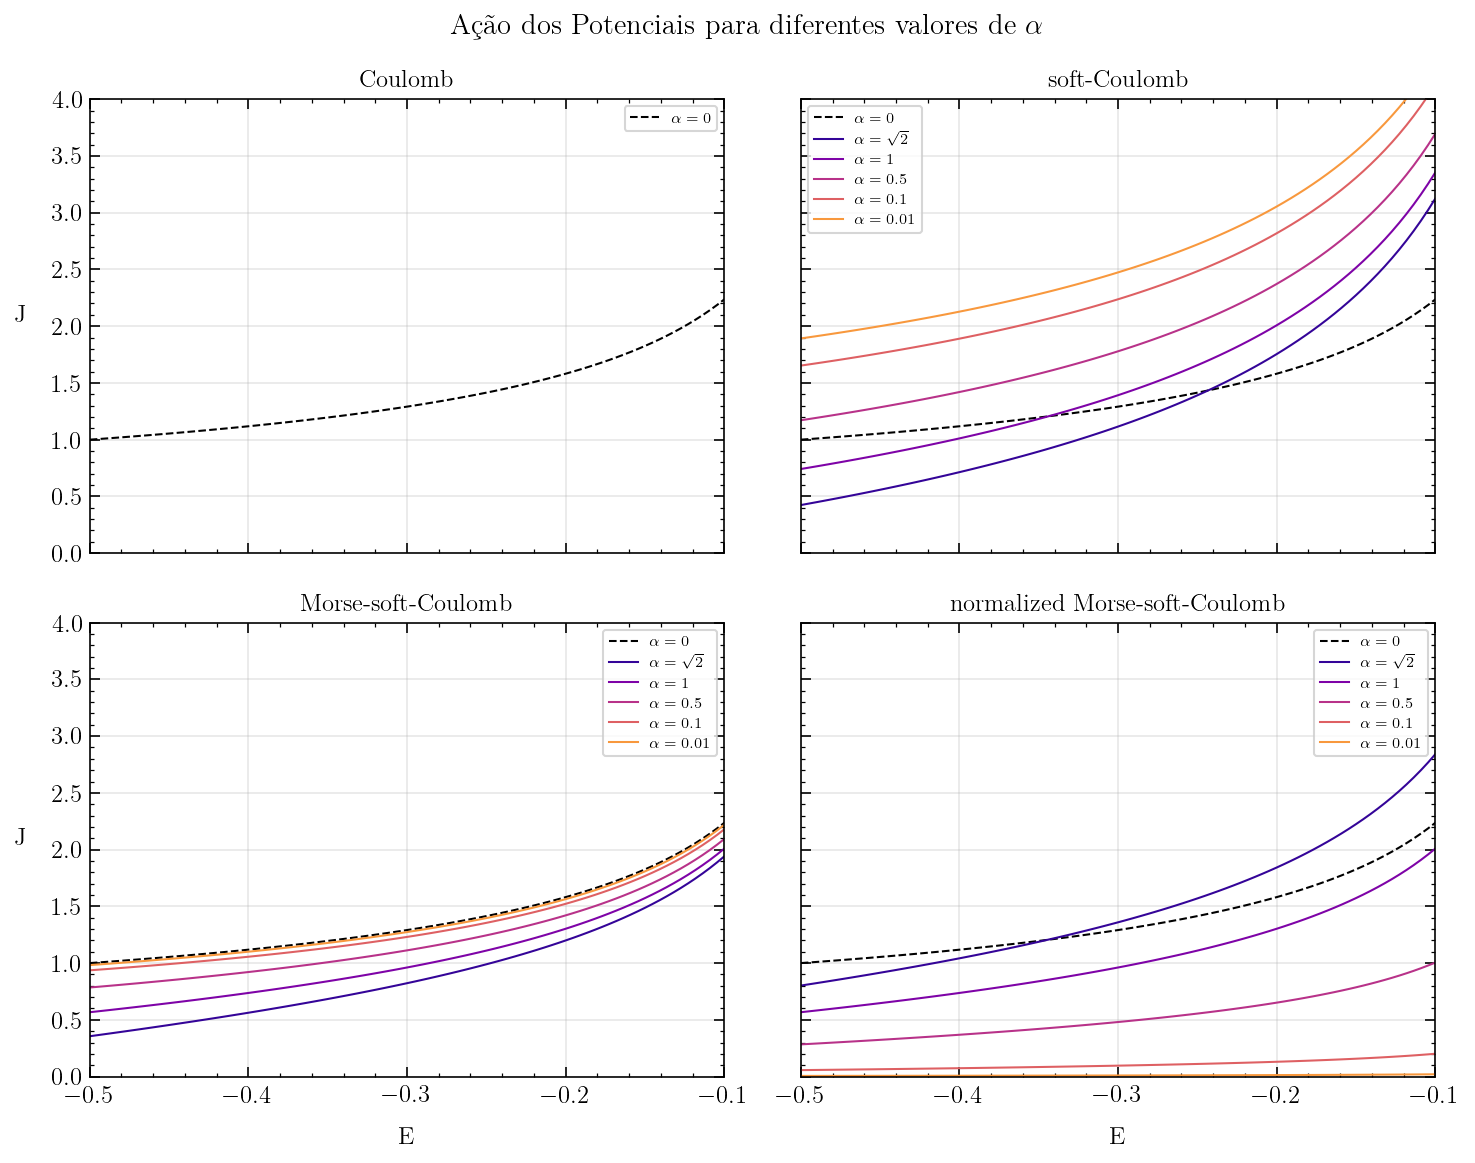

In [21]:
from emerald.classical.coulomb_unperturbed import C_action
from emerald.classical.sc_unperturbed import sC_action
from emerald.classical.msc_unperturbed import MsC_action
from emerald.classical.normalized_msc_unperturbed import nMsC_action

# Configuração do grid 2x2 de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)  
plt.subplots_adjust(wspace=0.3, hspace=0.4) 

alpha_array = [np.sqrt(2), 1, 0.5, 0.1, 0.01]
E_range = np.linspace(-0.5, -0.05, 100)

rM = 12

# Subplot 1
for i in range(2):
    for j in range(2):
        axs[i, j].plot(E_range, [C_action(E) for E in E_range], label=f'$\\alpha=0$', ls='dashed', c="black")

axs[0, 0].set_title('Coulomb', fontsize=12)
axs[0, 0].set_ylabel('J', rotation=0, labelpad=15)
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.3)

# Subplot 2
for alpha in alpha_array:
    axs[0, 1].plot(E_range, [sC_action(alpha, E) for E in E_range], label=f'$\\alpha={alpha if alpha != np.sqrt(2) else r"\sqrt{2}"}$')
axs[0, 1].set_title('soft-Coulomb', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid(alpha=0.3)

# Subplot 3
for alpha in alpha_array:
    axs[1, 0].plot(E_range, [MsC_action(alpha, E) for E in E_range], label=f'$\\alpha={alpha if alpha != np.sqrt(2) else r"\sqrt{2}"}$')
axs[1, 0].set_title('Morse-soft-Coulomb', fontsize=12)
axs[1, 0].legend()
axs[1, 0].set_ylabel('J', rotation=0, labelpad=15)
axs[1, 0].set_xlabel('E', labelpad=10)
axs[1, 0].set_xticks(np.arange(-0.5, 0, 0.1))
axs[1, 0].grid(alpha=0.3)

# Subplot 4
for alpha in alpha_array:
    axs[1, 1].plot(E_range, [nMsC_action(alpha, E) for E in E_range], label=f'$\\alpha={alpha if alpha != np.sqrt(2) else r"\sqrt{2}"}$')
axs[1, 1].set_title('normalized Morse-soft-Coulomb', fontsize=12)
axs[1, 1].legend()
axs[1, 1].set_xlabel('E', labelpad=10)
axs[1, 1].set_xticks(np.arange(-0.5, 0, 0.1))
axs[1, 1].grid(alpha=0.3)

# Título
fig.suptitle(r'Ação dos Potenciais para diferentes valores de $\alpha$', fontsize=14, y=0.98)

plt.xlim(-0.5, -0.1)
plt.ylim(0, 4)
plt.tight_layout()
plt.savefig("Fig3.pdf", bbox_inches="tight")
plt.show()

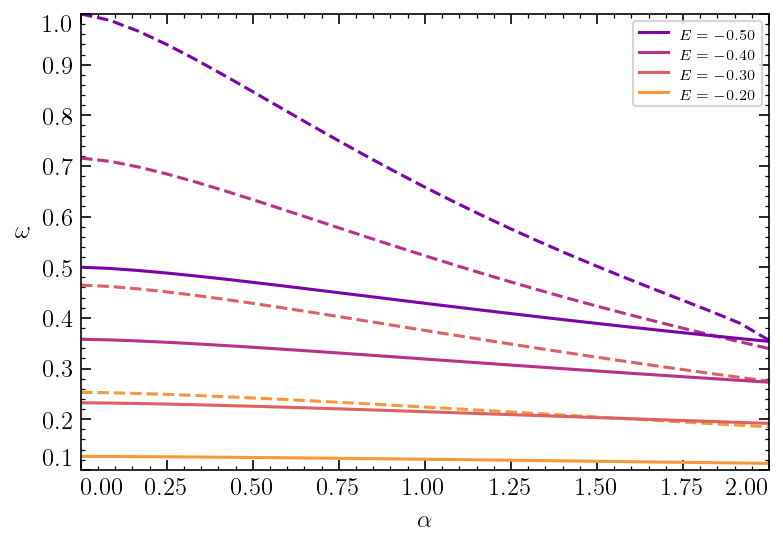

In [24]:
from emerald.classical.msc_unperturbed import MsC_angular_frequency
from emerald.classical.sc_unperturbed import sC_angular_frequency

from matplotlib.ticker import AutoMinorLocator
from matplotlib.gridspec import GridSpec
import numpy as np

fig, axs = plt.subplots(figsize=(6, 4))

alphas = np.linspace(1.e-3, 1.999, 25)

for i, E in enumerate([-0.5, -0.4, -0.3, -0.2]):
    omegas = np.array([MsC_angular_frequency(alpha, E, 1.e-7) for alpha in alphas])
    axs.plot(alphas, omegas, markersize=0, linewidth=1.5, ls="dashed", c=Perc5[i+1])#, label="$E = {:.2f} (MsC)$".format(E))
for i, E in enumerate([-0.5, -0.4, -0.3, -0.2]):
    omegas = np.array([sC_angular_frequency(alpha, E, 1.e-7) for alpha in alphas])
    axs.plot(alphas, omegas, markersize=0, linewidth=1.5, ls="solid", c=Perc5[i+1], label="$E = {:.2f}$".format(E))

axs.legend()
axs.set_xlabel("$\\alpha$")
axs.set_ylabel("$\\omega$", rotation=0, labelpad=10)
axs.set_ylim(0.1, 1)
axs.set_xlim(0., 2.)
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())

axs.get_yticklabels()[0].set_verticalalignment("bottom")
axs.get_yticklabels()[-1].set_verticalalignment("top")
axs.get_xticklabels()[0].set_horizontalalignment("left")
axs.get_xticklabels()[-1].set_horizontalalignment("right")

In [20]:
print(sC_angular_frequency(1.999, -0.5, 1.e-10))
print(MsC_angular_frequency(1.999, -0.5, 1.e-10))

0.3536205691469263
0.35621100246420345


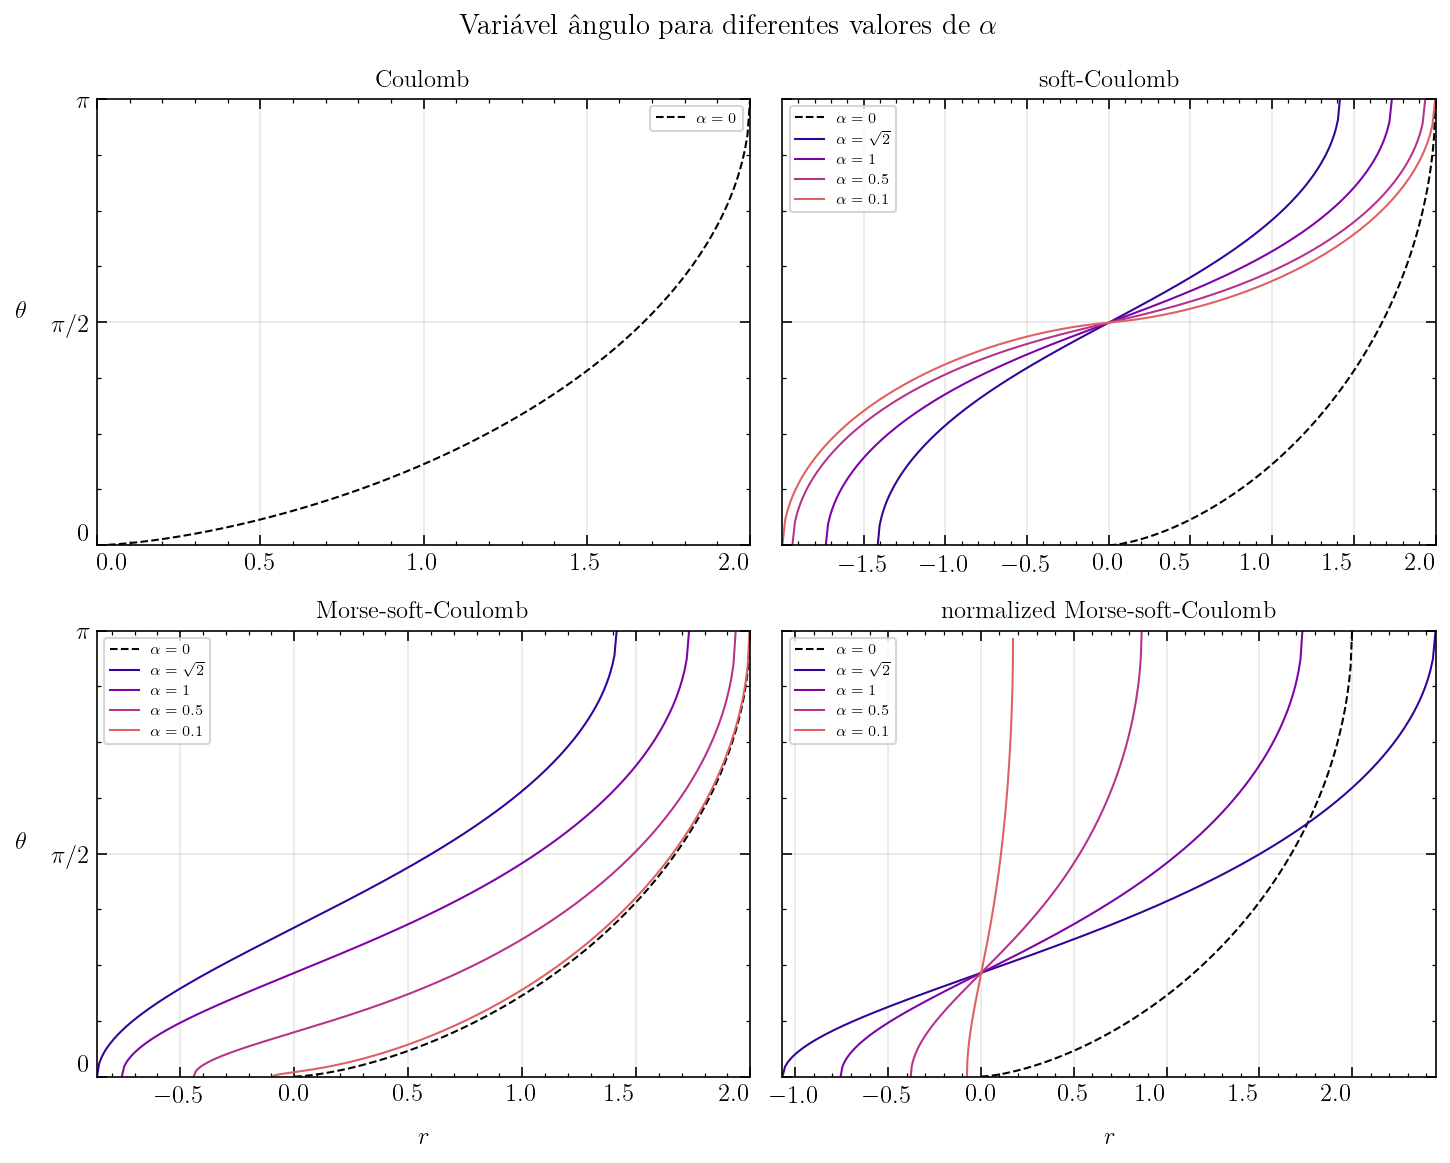

In [ ]:
from emerald.classical.coulomb_unperturbed import C_angle, C_position
from emerald.classical.sc_unperturbed import sC_angle, sC_position, sC_angular_frequency
from emerald.classical.msc_unperturbed import MsC_angle, MsC_position, MsC_angular_frequency
from emerald.classical.normalized_msc_unperturbed import nMsC_angle, nMsC_position, nMsC_angular_frequency

# Configuração do grid 2x2 de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=False, sharey=True)  
plt.subplots_adjust(wspace=0.3, hspace=0.4) 

alpha_array = [np.sqrt(2), 1, 0.5, 0.1]
#E_range = np.linspace(-0.5, -0.05, 100)

#rM = 12

E = -0.5

# Subplot 1
N = 250

rm, rM = C_return_points(E)
position_range = np.linspace(rm, rM, N)
angles = [C_angle(E, r) for r in position_range]
for i in range(2):
    for j in range(2):
        axs[i, j].plot(position_range, angles, label=f'$\\alpha=0$', ls='dashed', c='black')
        axs[i, j].get_xticklabels()[0].set_horizontalalignment("right")
        axs[i, j].grid(alpha=0.3)

axs[0, 0].get_xticklabels()[-1].set_horizontalalignment("right")
axs[0, 0].get_xticklabels()[0].set_horizontalalignment("left")
axs[0, 0].set_title('Coulomb', fontsize=12)
axs[0, 0].set_ylabel('$\\theta$', rotation=0, labelpad=15)
axs[0, 0].set_xticks(np.arange(0, 2.5, 0.5))
axs[0, 0].get_yticklabels()[-1].set_verticalalignment("top")
axs[0, 0].get_yticklabels()[0].set_verticalalignment("bottom")
axs[0, 0].legend()


# Subplot 2
for alpha in alpha_array:
    rm, rM = sC_return_points(alpha, E)
    freq = sC_angular_frequency(alpha, E)
    position_range = np.linspace(rm, rM, N)
    angles = [sC_angle(alpha, E, r, freq) for r in position_range]
    axs[0, 1].plot(position_range, angles, label=f'$\\alpha={alpha if alpha != np.sqrt(2) else r"\sqrt{2}"}$')
axs[0, 1].set_title('soft-Coulomb', fontsize=12)
axs[0, 1].legend()

# Subplot 3
for alpha in alpha_array:
    rm, rM = MsC_return_points(alpha, E)
    freq = MsC_angular_frequency(alpha, E)
    position_range = np.linspace(rm, rM, N)
    angles = [MsC_angle(alpha, E, r, freq) for r in position_range]
    axs[1, 0].plot(position_range, angles, label=f'$\\alpha={alpha if alpha != np.sqrt(2) else r"\sqrt{2}"}$')
axs[1, 0].set_ylabel('$\\theta$', rotation = 0, labelpad=15)
axs[1, 0].set_xlabel('$r$', labelpad=10)
axs[1, 0].get_yticklabels()[-1].set_verticalalignment("top")
axs[1, 0].get_yticklabels()[0].set_verticalalignment("bottom")
axs[1, 0].set_title('Morse-soft-Coulomb', fontsize=12)
axs[1, 0].legend()

# Subplot 4
for alpha in alpha_array:
    rm, rM = nMsC_return_points(alpha, E)
    freq = nMsC_angular_frequency(alpha, E)
    position_range = np.linspace(rm, rM, N)
    angles = [nMsC_angle(alpha, E, r, freq) for r in position_range]
    axs[1, 1].plot(position_range, angles, label=f'$\\alpha={alpha if alpha != np.sqrt(2) else r"\sqrt{2}"}$')
axs[1, 1].set_xlabel('$r$', labelpad=10)
axs[1, 1].set_title('normalized Morse-soft-Coulomb', fontsize=12)
axs[1, 1].legend()

# Título
fig.suptitle(r'Variável ângulo para diferentes valores de $\alpha$', fontsize=14, y=0.98)

#plt.xlim(-0.5, -0.1)
plt.ylim(0, np.pi)
plt.yticks( [0, np.pi/2, np.pi], ['$0$', '$\\pi/2$', '$\\pi$'] )
plt.tight_layout()
plt.savefig("fig.pdf", bbox_inches="tight")
plt.show()

## Probabilidade de ionização

In [5]:
import os
os.getcwd()



'/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/Dev/notebooks/development/potential_comparison'

In [7]:
results_dir = "../../../results/data/comparison/ionization/take8"

markers = [ "o", "^", "s", "X", "*" ] ; i=0

indexes = [0, 2, 4]
files = list(os.listdir(results_dir)[i] for i in indexes)
print(files)

['2025-12-02--22-13--C-ionization-frequency--a--0--F0--0.05.json', '2025-12-02--20-40--sC-ionization-frequency--a--0.2--F0--0.05.json', '2025-12-02--18-22--MsC-ionization-frequency--a--0.2--F0--0.05.json']


In [8]:
list(sorted(os.listdir(results_dir))[i] for i in indexes)

['2025-12-02--18-22--MsC-ionization-frequency--a--0.2--F0--0.05.json',
 '2025-12-02--20-40--sC-ionization-frequency--a--0.2--F0--0.05.json',
 '2025-12-02--22-13--C-ionization-frequency--a--0--F0--0.05.json']

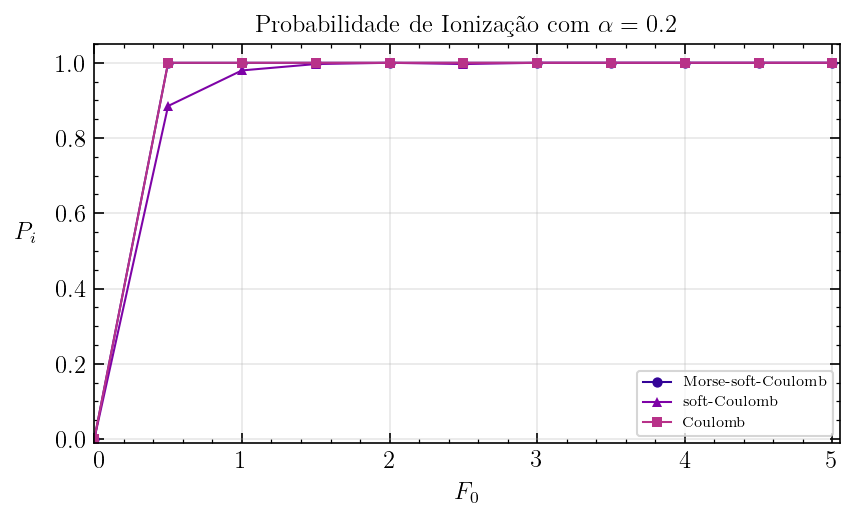

In [ ]:
import json
import os

results_dir = "../../../results/data/comparison/ionization/take7"

markers = [ "o", "^", "s", "X", "*" ] ; i=0

indexes = [0, 2, 4]
files = list(sorted(os.listdir(results_dir))[i] for i in indexes)
for filehandle in files:
    if filehandle.endswith(".json"):
        with open(os.path.join(results_dir, filehandle), "r") as f:
            data = json.load(f)

    plt.plot(data["parameters"]["field_amplitude_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], markersize=5)
    i += 1

# #plot last data point
# with open(os.path.join(results_dir, sorted(os.listdir(results_dir))[-1]), "r") as f:
#     data = json.load(f)

# plt.plot(data["parameters"]["field_amplitude_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], markersize=5, ls="dashed")

plt.xlabel("$F_0$")
plt.ylabel("$P_i$", rotation=0, labelpad=15)
plt.title("Probabilidade de Ionização com $\\alpha = 0.2$")
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(0, 5.05)
plt.ylim(-0.01, 1.05)
plt.gca().get_yticklabels()[0].set_verticalalignment("bottom")
plt.gca().get_yticklabels()[-1].set_verticalalignment("top")
plt.gca().get_xticklabels()[0].set_horizontalalignment("left")
plt.gca().get_xticklabels()[-1].set_horizontalalignment("right")
plt.savefig("Comp-a-0.2-amplitude.pdf", bbox_inches="tight")
plt.show()

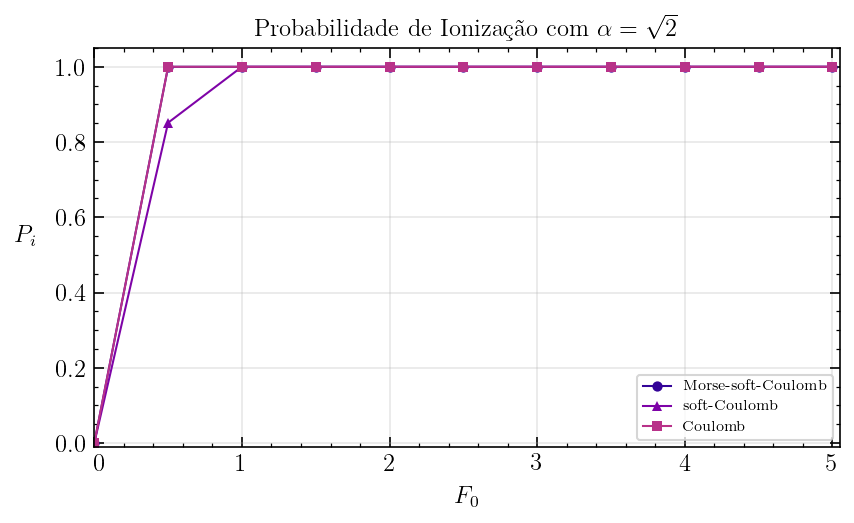

In [18]:
import json
import os

results_dir = "../../../results/data/comparison/ionization/take7"

markers = [ "o", "^", "s", "X", "*" ] ; i=0

indexes = [1, 3, 5]
files = list(sorted(os.listdir(results_dir))[i] for i in indexes)
for filehandle in files:
    if filehandle.endswith(".json"):
        with open(os.path.join(results_dir, filehandle), "r") as f:
            data = json.load(f)

    plt.plot(data["parameters"]["field_amplitude_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], markersize=5)
    i += 1

# #plot last data point
# with open(os.path.join(results_dir, sorted(os.listdir(results_dir))[-1]), "r") as f:
#     data = json.load(f)

# plt.plot(data["parameters"]["field_amplitude_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], markersize=5, ls="dashed")

plt.xlabel("$F_0$")
plt.ylabel("$P_i$", rotation=0, labelpad=15)
plt.title("Probabilidade de Ionização com $\\alpha = \\sqrt{2}$")
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(0, 5.05)
plt.ylim(-0.01, 1.05)
plt.gca().get_yticklabels()[0].set_verticalalignment("bottom")
plt.gca().get_yticklabels()[-1].set_verticalalignment("top")
plt.gca().get_xticklabels()[0].set_horizontalalignment("left")
plt.gca().get_xticklabels()[-1].set_horizontalalignment("right")
plt.savefig("Comp-a-1.41-amplitude.pdf", bbox_inches="tight")
plt.show()

In [12]:
markers = [ "o", "^", "s", "X", "*" ] ; i=0
indexes = [0, 2, 4]
files = list(sorted(os.listdir(results_dir))[i] for i in indexes)
files

['2025-12-02--18-22--MsC-ionization-frequency--a--0.2--F0--0.05.json',
 '2025-12-02--20-40--sC-ionization-frequency--a--0.2--F0--0.05.json',
 '2025-12-02--22-13--C-ionization-frequency--a--0--F0--0.05.json']

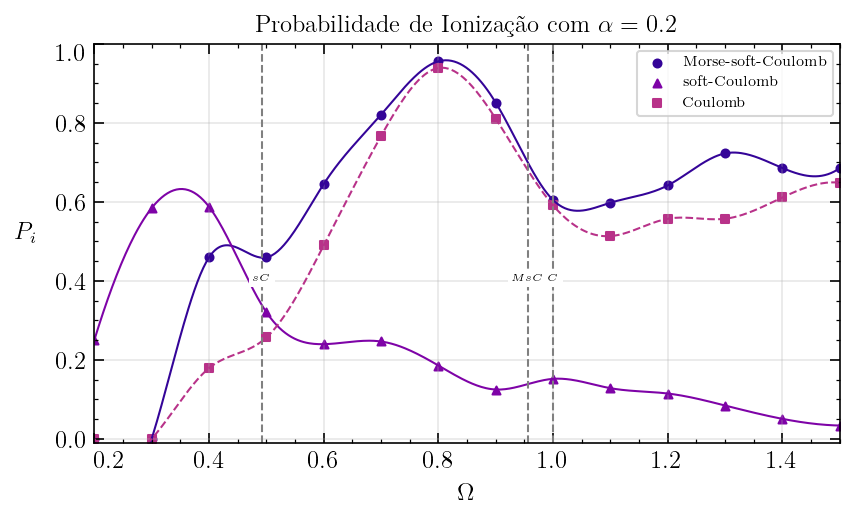

In [17]:
from scipy.interpolate import CubicSpline
import os
import json



results_dir = "../../../results/data/comparison/ionization/take8"

markers = [ "o", "^", "s", "X", "*" ] ; i=0
indexes = [0, 2, 4]
files = list(sorted(os.listdir(results_dir))[i] for i in indexes)

for filehandle in files[:-1]:
    if filehandle.endswith(".json"):
        with open(os.path.join(results_dir, filehandle), "r") as f:
            data = json.load(f)

    plt.scatter(data["parameters"]["field_frequency_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], s=15, c=Perc5[i])
    Omgs = data["parameters"]["field_frequency_set"]
    Pis = data["results"]["ionization_probabilities"]
    spln = CubicSpline(Omgs, Pis)
    
    x_new = np.linspace(Omgs[0], Omgs[-1], 500)
    y_new = spln(x_new)

    plt.plot(x_new, y_new, c=Perc5[i])
    i += 1

with open(os.path.join(results_dir, files[-1]), "r") as f:
    data = json.load(f)

plt.scatter(data["parameters"]["field_frequency_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], s=15, c=Perc5[i])
Omgs = data["parameters"]["field_frequency_set"]
Pis = data["results"]["ionization_probabilities"]
spln = CubicSpline(Omgs, Pis)

x_new = np.linspace(Omgs[0], Omgs[-1], 500)
y_new = spln(x_new)
plt.plot(x_new, y_new, c=Perc5[i], ls="dashed")

from emerald.classical.sc_unperturbed import sC_angular_frequency
from emerald.classical.msc_unperturbed import MsC_angular_frequency
from emerald.classical.coulomb_unperturbed import C_angular_frequency

# Plot 3 grey vertical lines (dashed) at x position corresponding to the angular frequencies of the potentials at E = -0.5 and alpha = 0.2, height 0 to the value of the y axis limit (1)
E = -0.5
alpha = 0.2
omega_C = C_angular_frequency(E)
omega_sC = sC_angular_frequency(alpha, E)
omega_MsC = MsC_angular_frequency(alpha, E)


plt.axvline(x=omega_C, color='grey', linestyle='dashed', ymax=1)
plt.axvline(x=omega_sC, color='grey', linestyle='dashed', ymax=1)
plt.axvline(x=omega_MsC, color='grey', linestyle='dashed', ymax=1)

# Mark the lines with text at the top - background color white
plt.text(omega_C, 0.4, r'$C$', horizontalalignment='center', color='black', backgroundcolor='white', fontsize=5)
plt.text(omega_sC, 0.4, r'$sC$', horizontalalignment='center', color='black', backgroundcolor='white', fontsize=5)
plt.text(omega_MsC, 0.4, r'$MsC$', horizontalalignment='center', color='black', backgroundcolor='white', fontsize=5)

plt.xlabel(r"$\Omega$")
plt.ylabel("$P_i$", rotation=0, labelpad=15)
plt.title(r"Probabilidade de Ionização com $\alpha = 0.2$")
plt.legend()
plt.grid(alpha=0.3)
#plt.xlim(0.2, 1.5)
plt.ylim(-0.01, 1)
#plt.xticks(np.arange(0.2, 1.8, 0.2))
plt.gca().get_yticklabels()[0].set_verticalalignment("bottom")
plt.gca().get_yticklabels()[-1].set_verticalalignment("top")
plt.gca().get_xticklabels()[0].set_horizontalalignment("left")
plt.gca().get_xticklabels()[-1].set_horizontalalignment("right")
plt.savefig("take8-Comp-a-0.2-frequency.pdf", bbox_inches="tight")
plt.show()


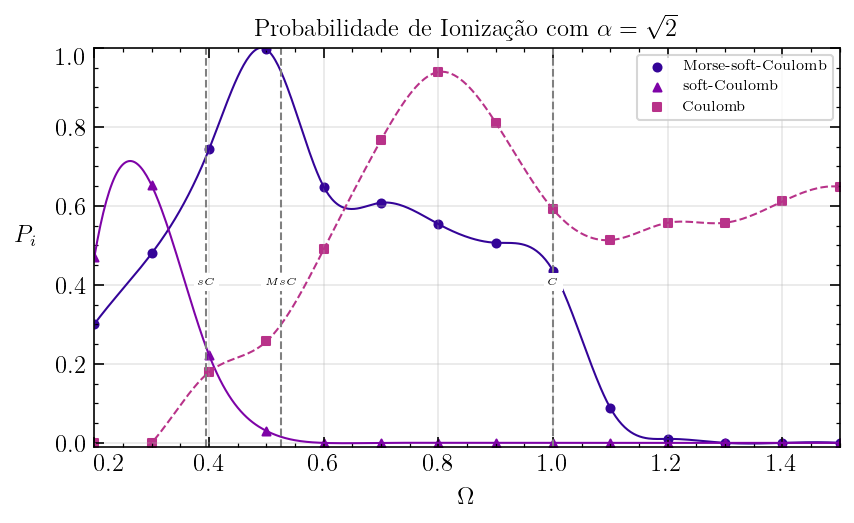

In [16]:
from scipy.interpolate import CubicSpline
import os
import json



results_dir = "../../../results/data/comparison/ionization/take8"

markers = [ "o", "^", "s", "X", "*" ] ; i=0
indexes = [1, 3, 4]
files = list(sorted(os.listdir(results_dir))[i] for i in indexes)

for filehandle in files[:-1]:
    if filehandle.endswith(".json"):
        with open(os.path.join(results_dir, filehandle), "r") as f:
            data = json.load(f)

    plt.scatter(data["parameters"]["field_frequency_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], s=15, c=Perc5[i])
    Omgs = data["parameters"]["field_frequency_set"]
    Pis = data["results"]["ionization_probabilities"]
    spln = CubicSpline(Omgs, Pis)
    
    x_new = np.linspace(Omgs[0], Omgs[-1], 500)
    y_new = spln(x_new)

    plt.plot(x_new, y_new, c=Perc5[i])
    i += 1

with open(os.path.join(results_dir, files[-1]), "r") as f:
    data = json.load(f)

plt.scatter(data["parameters"]["field_frequency_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], s=15, c=Perc5[i])
Omgs = data["parameters"]["field_frequency_set"]
Pis = data["results"]["ionization_probabilities"]
spln = CubicSpline(Omgs, Pis)

x_new = np.linspace(Omgs[0], Omgs[-1], 500)
y_new = spln(x_new)
plt.plot(x_new, y_new, c=Perc5[i], ls="dashed")

from emerald.classical.sc_unperturbed import sC_angular_frequency
from emerald.classical.msc_unperturbed import MsC_angular_frequency
from emerald.classical.coulomb_unperturbed import C_angular_frequency

# Plot 3 grey vertical lines (dashed) at x position corresponding to the angular frequencies of the potentials at E = -0.5 and alpha = 0.2, height 0 to the value of the y axis limit (1)
E = -0.5
alpha = np.sqrt(2)
omega_C = C_angular_frequency(E)
omega_sC = sC_angular_frequency(alpha, E)
omega_MsC = MsC_angular_frequency(alpha, E)


plt.axvline(x=omega_C, color='grey', linestyle='dashed', ymax=1)
plt.axvline(x=omega_sC, color='grey', linestyle='dashed', ymax=1)
plt.axvline(x=omega_MsC, color='grey', linestyle='dashed', ymax=1)

# Mark the lines with text at the top - background color white
plt.text(omega_C, 0.4, r'$C$', horizontalalignment='center', color='black', backgroundcolor='white', fontsize=5)
plt.text(omega_sC, 0.4, r'$sC$', horizontalalignment='center', color='black', backgroundcolor='white', fontsize=5)
plt.text(omega_MsC, 0.4, r'$MsC$', horizontalalignment='center', color='black', backgroundcolor='white', fontsize=5)

plt.xlabel(r"$\Omega$")
plt.ylabel("$P_i$", rotation=0, labelpad=15)
plt.title(r"Probabilidade de Ionização com $\alpha = \sqrt{2}$")
plt.legend()
plt.grid(alpha=0.3)
#plt.xlim(0.5, 1.5)
plt.ylim(-0.01, 1)
#plt.xticks(np.arange(0.5, 1.6, 0.2))
plt.gca().get_yticklabels()[0].set_verticalalignment("bottom")
plt.gca().get_yticklabels()[-1].set_verticalalignment("top")
plt.gca().get_xticklabels()[0].set_horizontalalignment("left")
plt.gca().get_xticklabels()[-1].set_horizontalalignment("right")
plt.savefig("take8-Comp-a-1.414-frequency.pdf", bbox_inches="tight")
plt.show()


In [43]:
C_angular_frequency(-0.5)

1.0

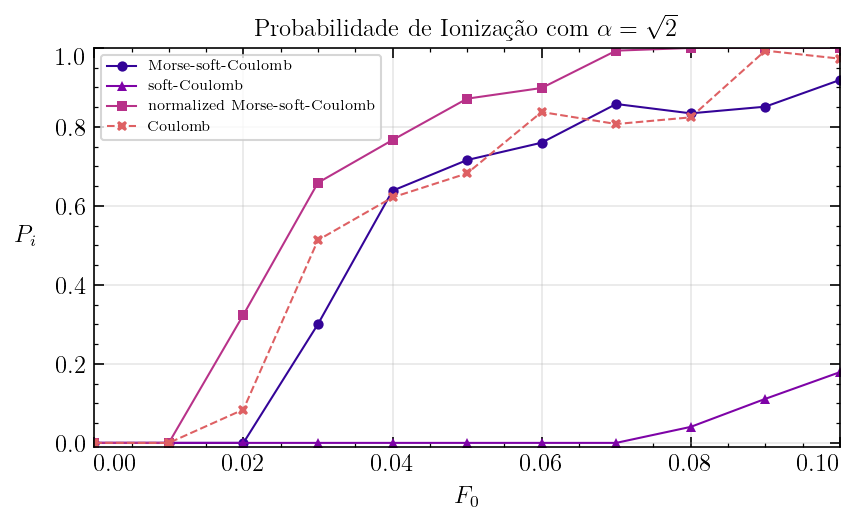

In [4]:
import json
import os

results_dir = "../../../results/data/comparison/ionization/take2"

markers = [ "o", "^", "s", "X", "*" ] ; i=0

for filehandle in sorted(os.listdir(results_dir))[:-1]:
    if filehandle.endswith(".json"):
        with open(os.path.join(results_dir, filehandle), "r") as f:
            data = json.load(f)

    plt.plot(data["parameters"]["field_amplitude_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], markersize=5)
    i += 1

#plot last data point
with open(os.path.join(results_dir, sorted(os.listdir(results_dir))[-1]), "r") as f:
    data = json.load(f)

plt.plot(data["parameters"]["field_amplitude_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], markersize=5, ls="dashed")


plt.xlabel("$F_0$")
plt.ylabel("$P_i$", rotation=0, labelpad=15)
plt.title(r"Probabilidade de Ionização com $\alpha = \sqrt{2}$")
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(0, 0.1)
plt.ylim(-0.01, 1)
plt.gca().get_yticklabels()[0].set_verticalalignment("bottom")
plt.gca().get_yticklabels()[-1].set_verticalalignment("top")
plt.gca().get_xticklabels()[0].set_horizontalalignment("left")
plt.gca().get_xticklabels()[-1].set_horizontalalignment("right")
plt.savefig("Fig6.pdf", bbox_inches="tight")
plt.show()

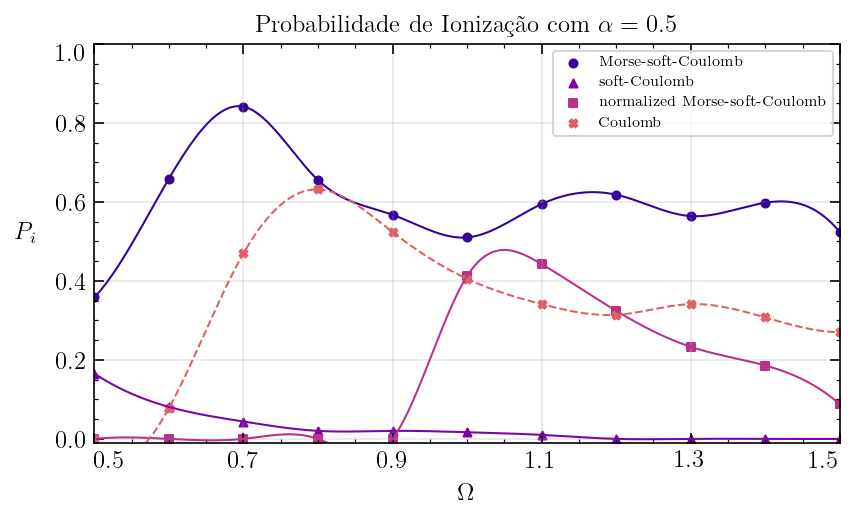

In [10]:
from scipy.interpolate import CubicSpline
import os
import json

results_dir = "../../../results/data/comparison/ionization/take3"

markers = [ "o", "^", "s", "X", "*" ] ; i=0


for filehandle in sorted(os.listdir(results_dir))[:-1]:
    if filehandle.endswith(".json"):
        with open(os.path.join(results_dir, filehandle), "r") as f:
            data = json.load(f)

    plt.scatter(data["parameters"]["field_frequency_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], s=15, c=Perc5[i])
    Omgs = data["parameters"]["field_frequency_set"]
    Pis = data["results"]["ionization_probabilities"]
    spln = CubicSpline(Omgs, Pis)
    
    x_new = np.linspace(Omgs[0], Omgs[-1], 500)
    y_new = spln(x_new)

    plt.plot(x_new, y_new, c=Perc5[i])
    i += 1


with open(os.path.join(results_dir, sorted(os.listdir(results_dir))[-1]), "r") as f:
    data = json.load(f)

plt.scatter(data["parameters"]["field_frequency_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], s=15, c=Perc5[i])
Omgs = data["parameters"]["field_frequency_set"]
Pis = data["results"]["ionization_probabilities"]
spln = CubicSpline(Omgs, Pis)

x_new = np.linspace(Omgs[0], Omgs[-1], 500)
y_new = spln(x_new)
plt.plot(x_new, y_new, c=Perc5[i], ls="dashed")

plt.xlabel(r"$\Omega$")
plt.ylabel("$P_i$", rotation=0, labelpad=15)
plt.title(r"Probabilidade de Ionização com $\alpha = 0.5$")
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(0.5, 1.5)
plt.ylim(-0.01, 1)
plt.xticks(np.arange(0.5, 1.6, 0.2))
plt.gca().get_yticklabels()[0].set_verticalalignment("bottom")
plt.gca().get_yticklabels()[-1].set_verticalalignment("top")
plt.gca().get_xticklabels()[0].set_horizontalalignment("left")
plt.gca().get_xticklabels()[-1].set_horizontalalignment("right")
plt.savefig("Fig7.pdf", bbox_inches="tight")
plt.show()


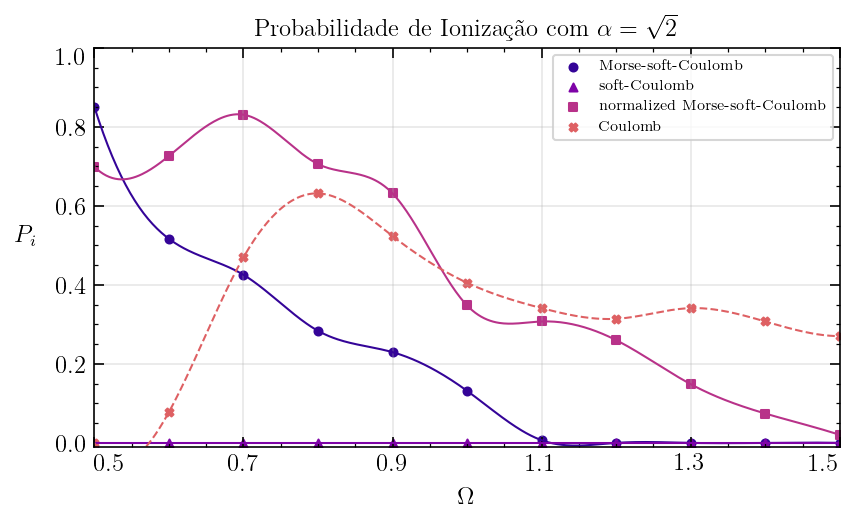

In [9]:
from scipy.interpolate import CubicSpline
import os
import json

results_dir = "../../../results/data/comparison/ionization/take4"

markers = [ "o", "^", "s", "X", "*" ] ; i=0


for filehandle in sorted(os.listdir(results_dir))[:-1]:
    if filehandle.endswith(".json"):
        with open(os.path.join(results_dir, filehandle), "r") as f:
            data = json.load(f)

    plt.scatter(data["parameters"]["field_frequency_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], s=15, c=Perc5[i])
    Omgs = data["parameters"]["field_frequency_set"]
    Pis = data["results"]["ionization_probabilities"]
    spln = CubicSpline(Omgs, Pis)
    
    x_new = np.linspace(Omgs[0], Omgs[-1], 500)
    y_new = spln(x_new)

    plt.plot(x_new, y_new, c=Perc5[i])
    i += 1


with open(os.path.join(results_dir, sorted(os.listdir(results_dir))[-1]), "r") as f:
    data = json.load(f)

plt.scatter(data["parameters"]["field_frequency_set"], data["results"]["ionization_probabilities"], label=data["parameters"]["potential"], marker=markers[i], s=15, c=Perc5[i])
Omgs = data["parameters"]["field_frequency_set"]
Pis = data["results"]["ionization_probabilities"]
spln = CubicSpline(Omgs, Pis)

x_new = np.linspace(Omgs[0], Omgs[-1], 500)
y_new = spln(x_new)
plt.plot(x_new, y_new, c=Perc5[i], ls="dashed")

plt.xlabel(r"$\Omega$")
plt.ylabel("$P_i$", rotation=0, labelpad=15)
plt.title(r"Probabilidade de Ionização com $\alpha = \sqrt 2$")
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(0.5, 1.5)
plt.ylim(-0.01, 1)
plt.xticks(np.arange(0.5, 1.6, 0.2))
plt.gca().get_yticklabels()[0].set_verticalalignment("bottom")
plt.gca().get_yticklabels()[-1].set_verticalalignment("top")
plt.gca().get_xticklabels()[0].set_horizontalalignment("left")
plt.gca().get_xticklabels()[-1].set_horizontalalignment("right")
plt.savefig("Fig9.pdf", bbox_inches="tight")
plt.show()


## Teste de Seção de Poincaré nas variáveis ângulo e energia
1. Potencial soft-Coulomb

In [1]:
import emerald

In [1]:
import numpy as np
from emerald.classical.coulomb_poincare import C_poincare_energies

alpha = np.sqrt(2) ; E_range = np.arange(-0.6, -0.35, 0.05) ; field_amplitude = 0.025 ; field_frequency = 1. ; points = 100 ; trajectories = 20


data = C_poincare_energies(E_range, field_amplitude, field_frequency, points, trajectories, np.pi/2, 1.e-4)

Condições iniciais calculadas
Condições iniciais calculadas
Condições iniciais calculadas
Condições iniciais calculadas
Condições iniciais calculadas


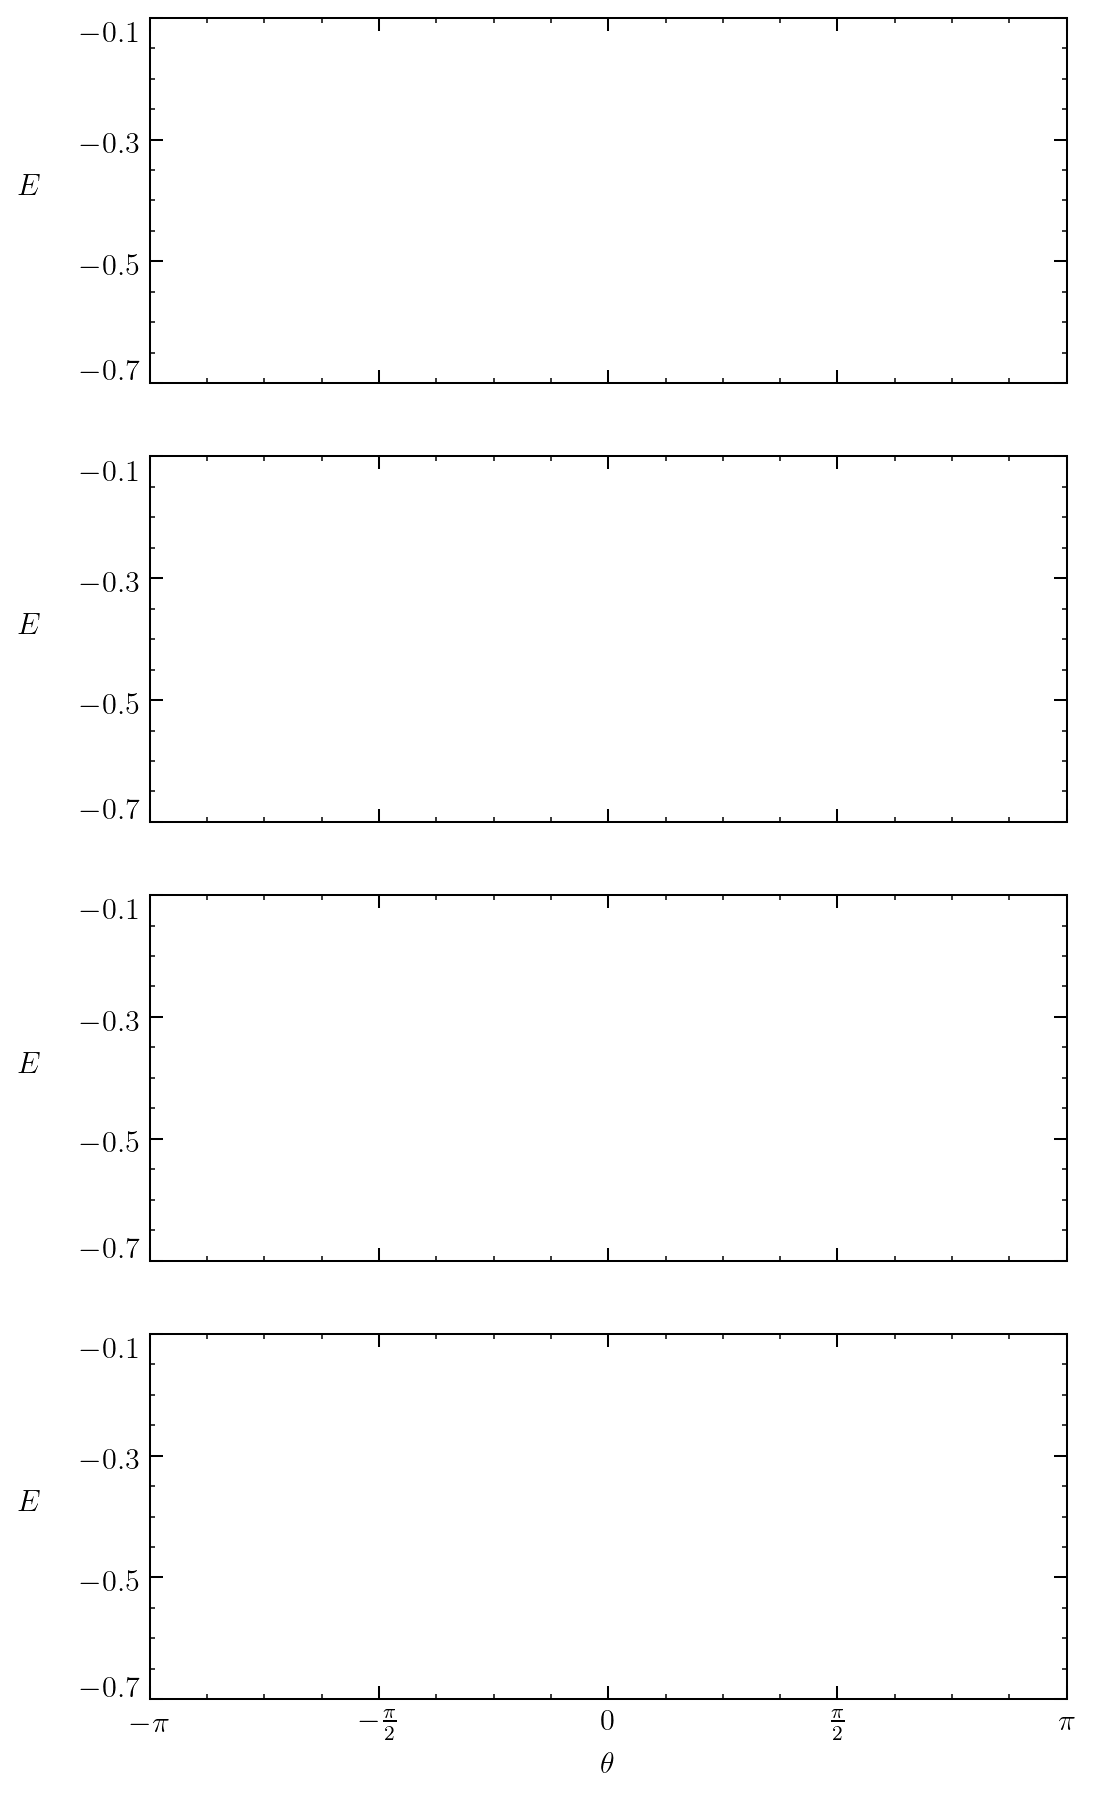

In [25]:
fig, axs = plt.subplots(4, 1, sharex=True)
fig.set_figwidth(6.5)
fig.set_figheight(12)
fig.set_dpi(182)
# Remove vertical spacing between subplots
plt.subplots_adjust(hspace=0.2)

titles = ["(a) ", "(b) ", "(c) ", "(d) "]

#set title for the figure

fig.gca().set_xlim(-np.pi, np.pi)
fig.gca().set_xticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"])
fig.gca().set_xlabel(r"$\theta$")

for i in range(4):
    axs[i].set_ylabel(r"$E$", rotation=0, labelpad=20)
    axs[i].set_ylim(-0.7, -0.1)
    axs[i].set_yticks(np.arange(-0.7, 0.1, 0.2))
    axs[i].get_yticklabels()[0].set_verticalalignment("bottom")
    axs[i].get_yticklabels()[-1].set_verticalalignment("top")


# Show plot
plt.show()

['../../../results/data/comparison/poincare/take1/2025-08-01--01-14--MsC-poincare-energies--a--1.4142135623730951--F0--0.025--Omg--1.json', '../../../results/data/comparison/poincare/take1/2025-08-01--02-07--sC-poincare-energies--a--1.4142135623730951--F0--0.025--Omg--1.json', '../../../results/data/comparison/poincare/take1/2025-08-01--03-24--nMsC-poincare-energies--a--1.4142135623730951--F0--0.025--Omg--1.json', '../../../results/data/comparison/poincare/take1/2025-08-01--03-29--C-poincare-energies--a--0--F0--0.025--Omg--1.json']


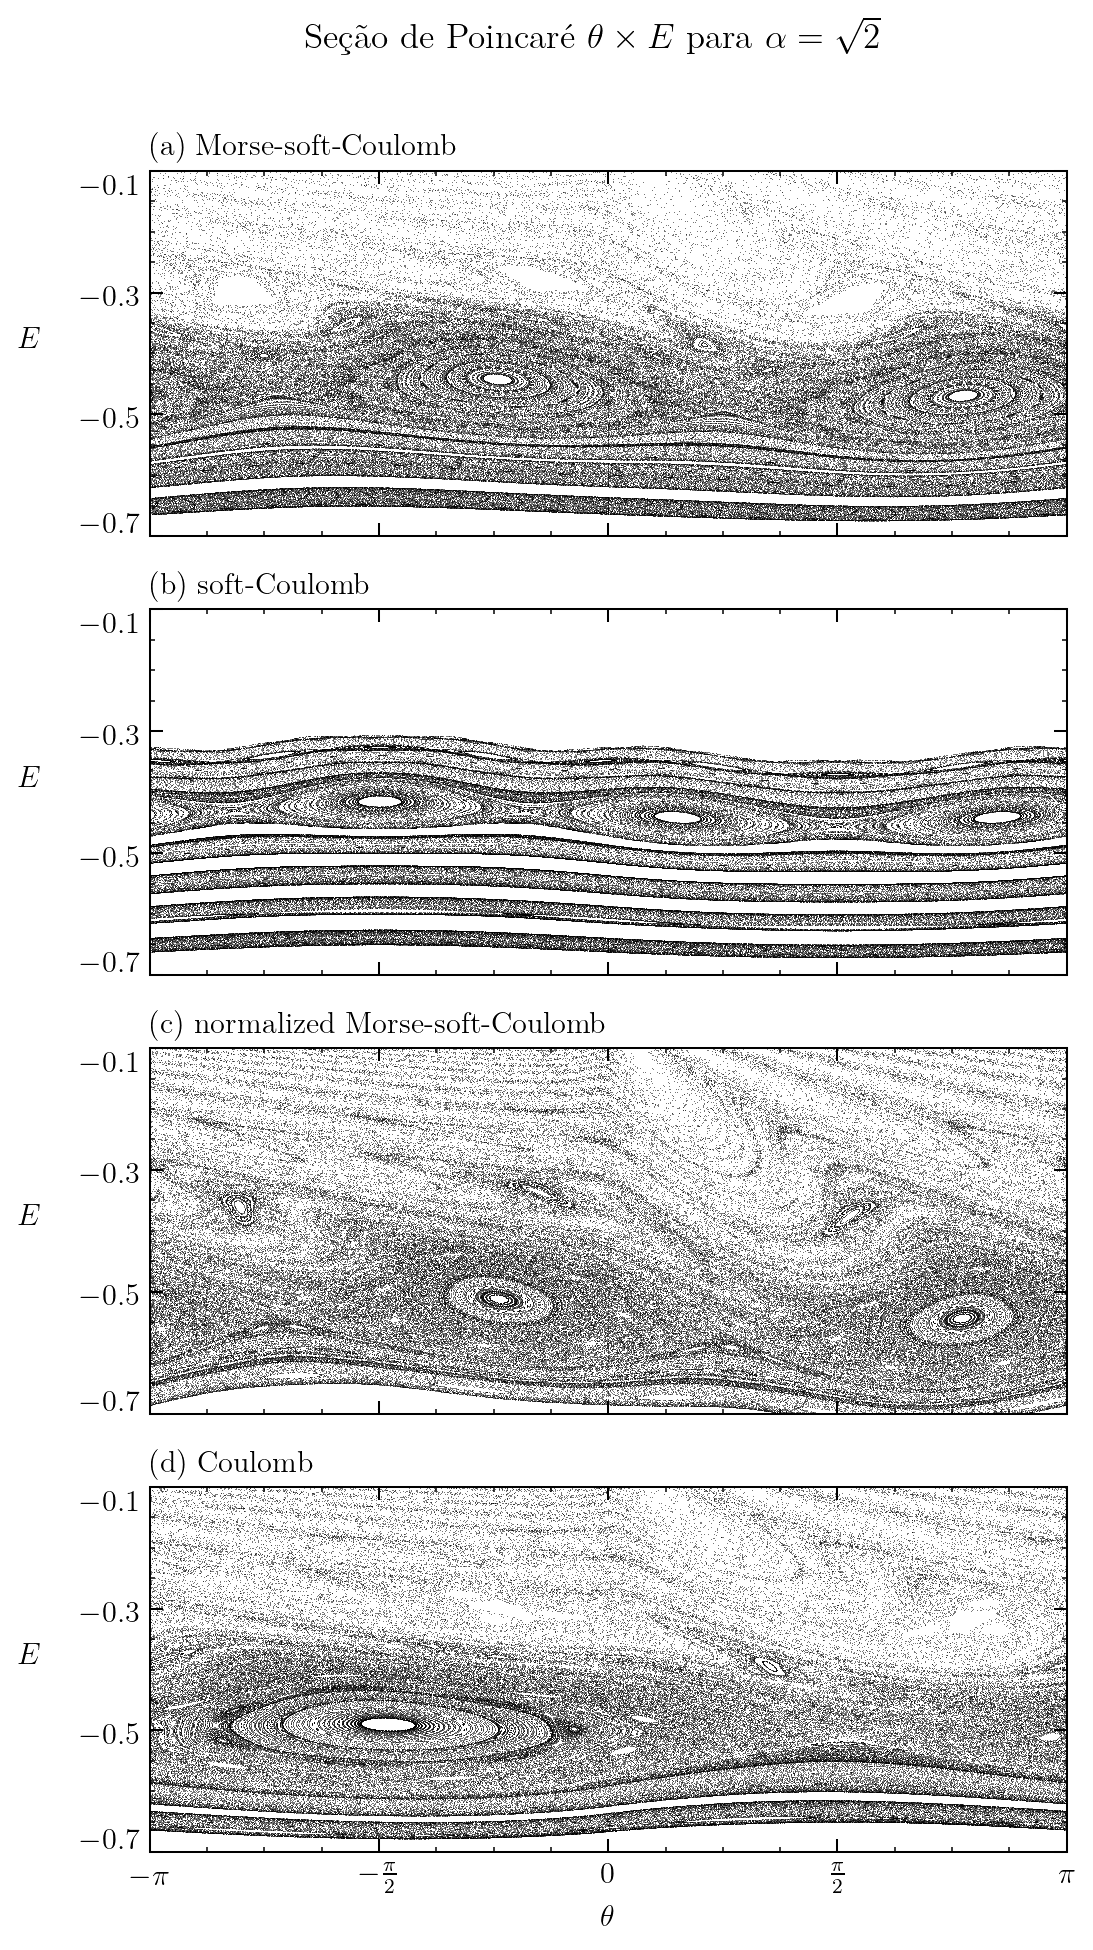

In [ ]:
results_dir = "../../../results/data/comparison/poincare/take1"

# Get list of all files and directories
all_items = os.listdir(results_dir)

# Filter out only files
files = sorted([os.path.join(results_dir, f) for f in all_items if os.path.isfile(os.path.join(results_dir, f))])

print(files)
fig.suptitle(r"Seção de Poincaré $\theta \times E$ para $\alpha = \sqrt{2}$", fontsize=14, y=0.95)

for i in range(4):
    data = json.load( open(files[i], "r") )

    section = np.array(data["results"]["poincare_map"])


    #axs[0].set_ylim(-0.3, -0.24)
    #axs4[i].set_title(r"Poincaré map $\theta \times E$ for $\alpha = {}$".format(alpha))
    axs[i].scatter( section[:, 0], section[:, 1], s=0.25, marker=".", lw=0, c="black", rasterized=True )
    axs[i].set_title(titles[i] + data["parameters"]["potential"], loc='left', fontweight='bold')


#data = json.load( open(files[3], "r") )
#
#plotable = data["data"]
#section = np.array(data["data"])

#axs4[3].set_title(r"Poincaré map $\theta \times E$ for $\alpha = 0$ (Coulomb)")
#axs[3].scatter( section[:, 0], section[:, 1], s=0.25, marker=".", lw=0, c="black", rasterized=True )
fig.savefig("Fig7.pdf", bbox_inches="tight")
fig

['../../../results/data/comparison/poincare/take2/2025-08-01--01-24--MsC-poincare-energies--a--0.1--F0--0.025--Omg--1.json', '../../../results/data/comparison/poincare/take2/2025-08-01--02-24--sC-poincare-energies--a--0.1--F0--0.025--Omg--1.json', '../../../results/data/comparison/poincare/take2/2025-08-01--03-12--nMsC-poincare-energies--a--0.1--F0--0.025--Omg--1.json', '../../../results/data/comparison/poincare/take2/2025-08-01--03-23--C-poincare-energies--a--0--F0--0.025--Omg--1.json']


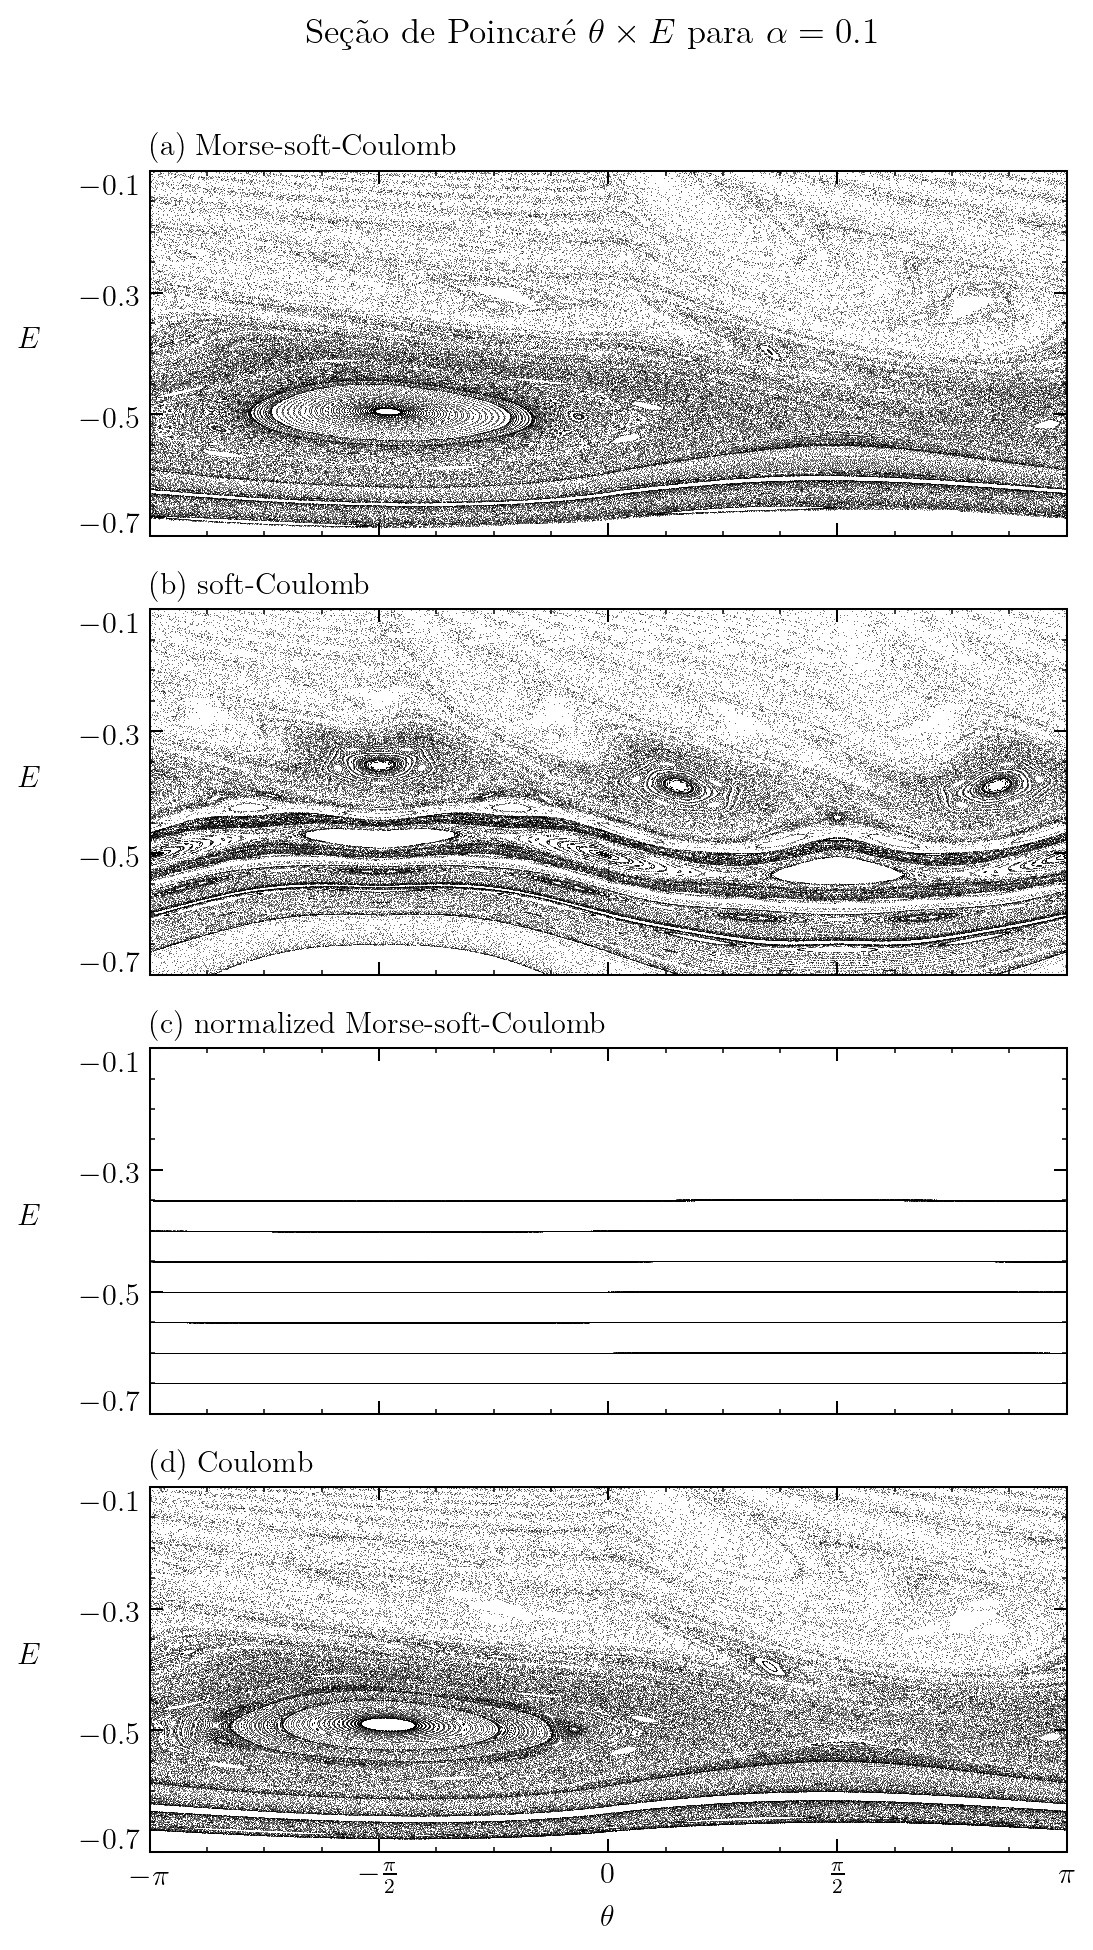

In [26]:
results_dir = "../../../results/data/comparison/poincare/take2"

# Get list of all files and directories
all_items = os.listdir(results_dir)

# Filter out only files
files = sorted([os.path.join(results_dir, f) for f in all_items if os.path.isfile(os.path.join(results_dir, f))])

print(files)
fig.suptitle(r"Seção de Poincaré $\theta \times E$ para $\alpha = 0.1$", fontsize=14, y=0.95)

for i in range(4):
    data = json.load( open(files[i], "r") )

    section = np.array(data["results"]["poincare_map"])


    #axs[0].set_ylim(-0.3, -0.24)
    #axs4[i].set_title(r"Poincaré map $\theta \times E$ for $\alpha = {}$".format(alpha))
    axs[i].scatter( section[:, 0], section[:, 1], s=0.25, marker=".", lw=0, c="black", rasterized=True )
    axs[i].set_title(titles[i] + data["parameters"]["potential"], loc='left', fontweight='bold')


#data = json.load( open(files[3], "r") )
#
#plotable = data["data"]
#section = np.array(data["data"])

#axs4[3].set_title(r"Poincaré map $\theta \times E$ for $\alpha = 0$ (Coulomb)")
#axs[3].scatter( section[:, 0], section[:, 1], s=0.25, marker=".", lw=0, c="black", rasterized=True )
fig.savefig("Fig8.pdf", bbox_inches="tight")
fig

```α = 0.5 ; E_array = [-0.45, -0.5, -0.55]```

# Coulomb
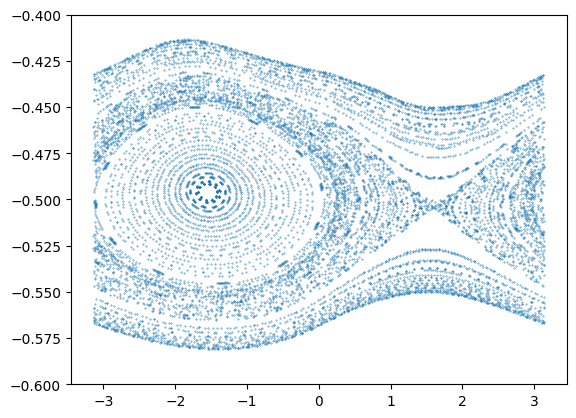
---
# Morse-soft-Coulomb
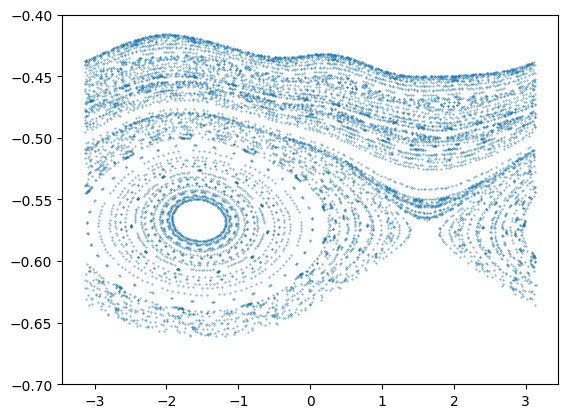
---
# soft-Coulomb
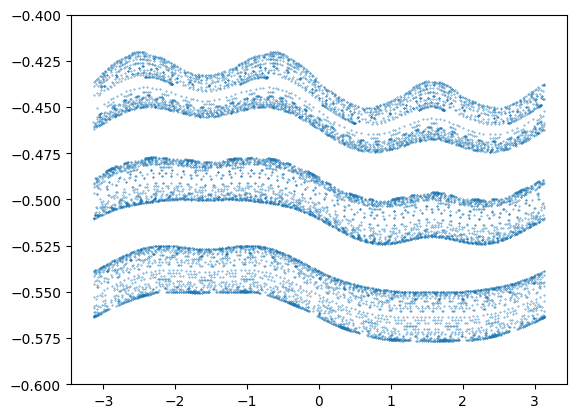
---
# normalized Morse-soft-Coulomb
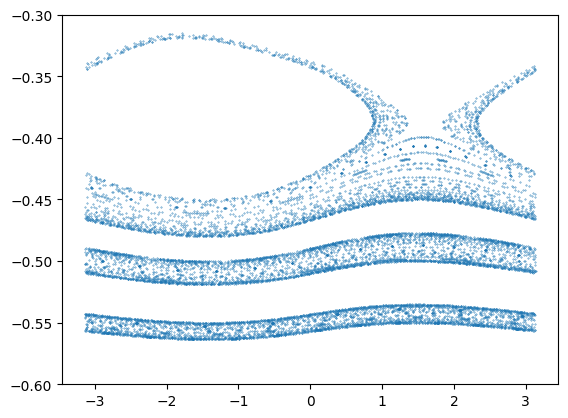